In [ ]:
!nvidia-smi

Fri Apr 11 23:10:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q
!pip install pymongo

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="api key")
project = rf.workspace("my workspace").project("perahu-done-v6vdz")
version = project.version(1)
dataset = version.download("yolov8")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to perahu-done-1 in yolov8:: 100%|██████████| 5276/5276 [00:01<00:00, 4335.22it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 43.2MB/s]
New https://pypi.org/project/ultralytics/8.3.107 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/perahu-done-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False

/content


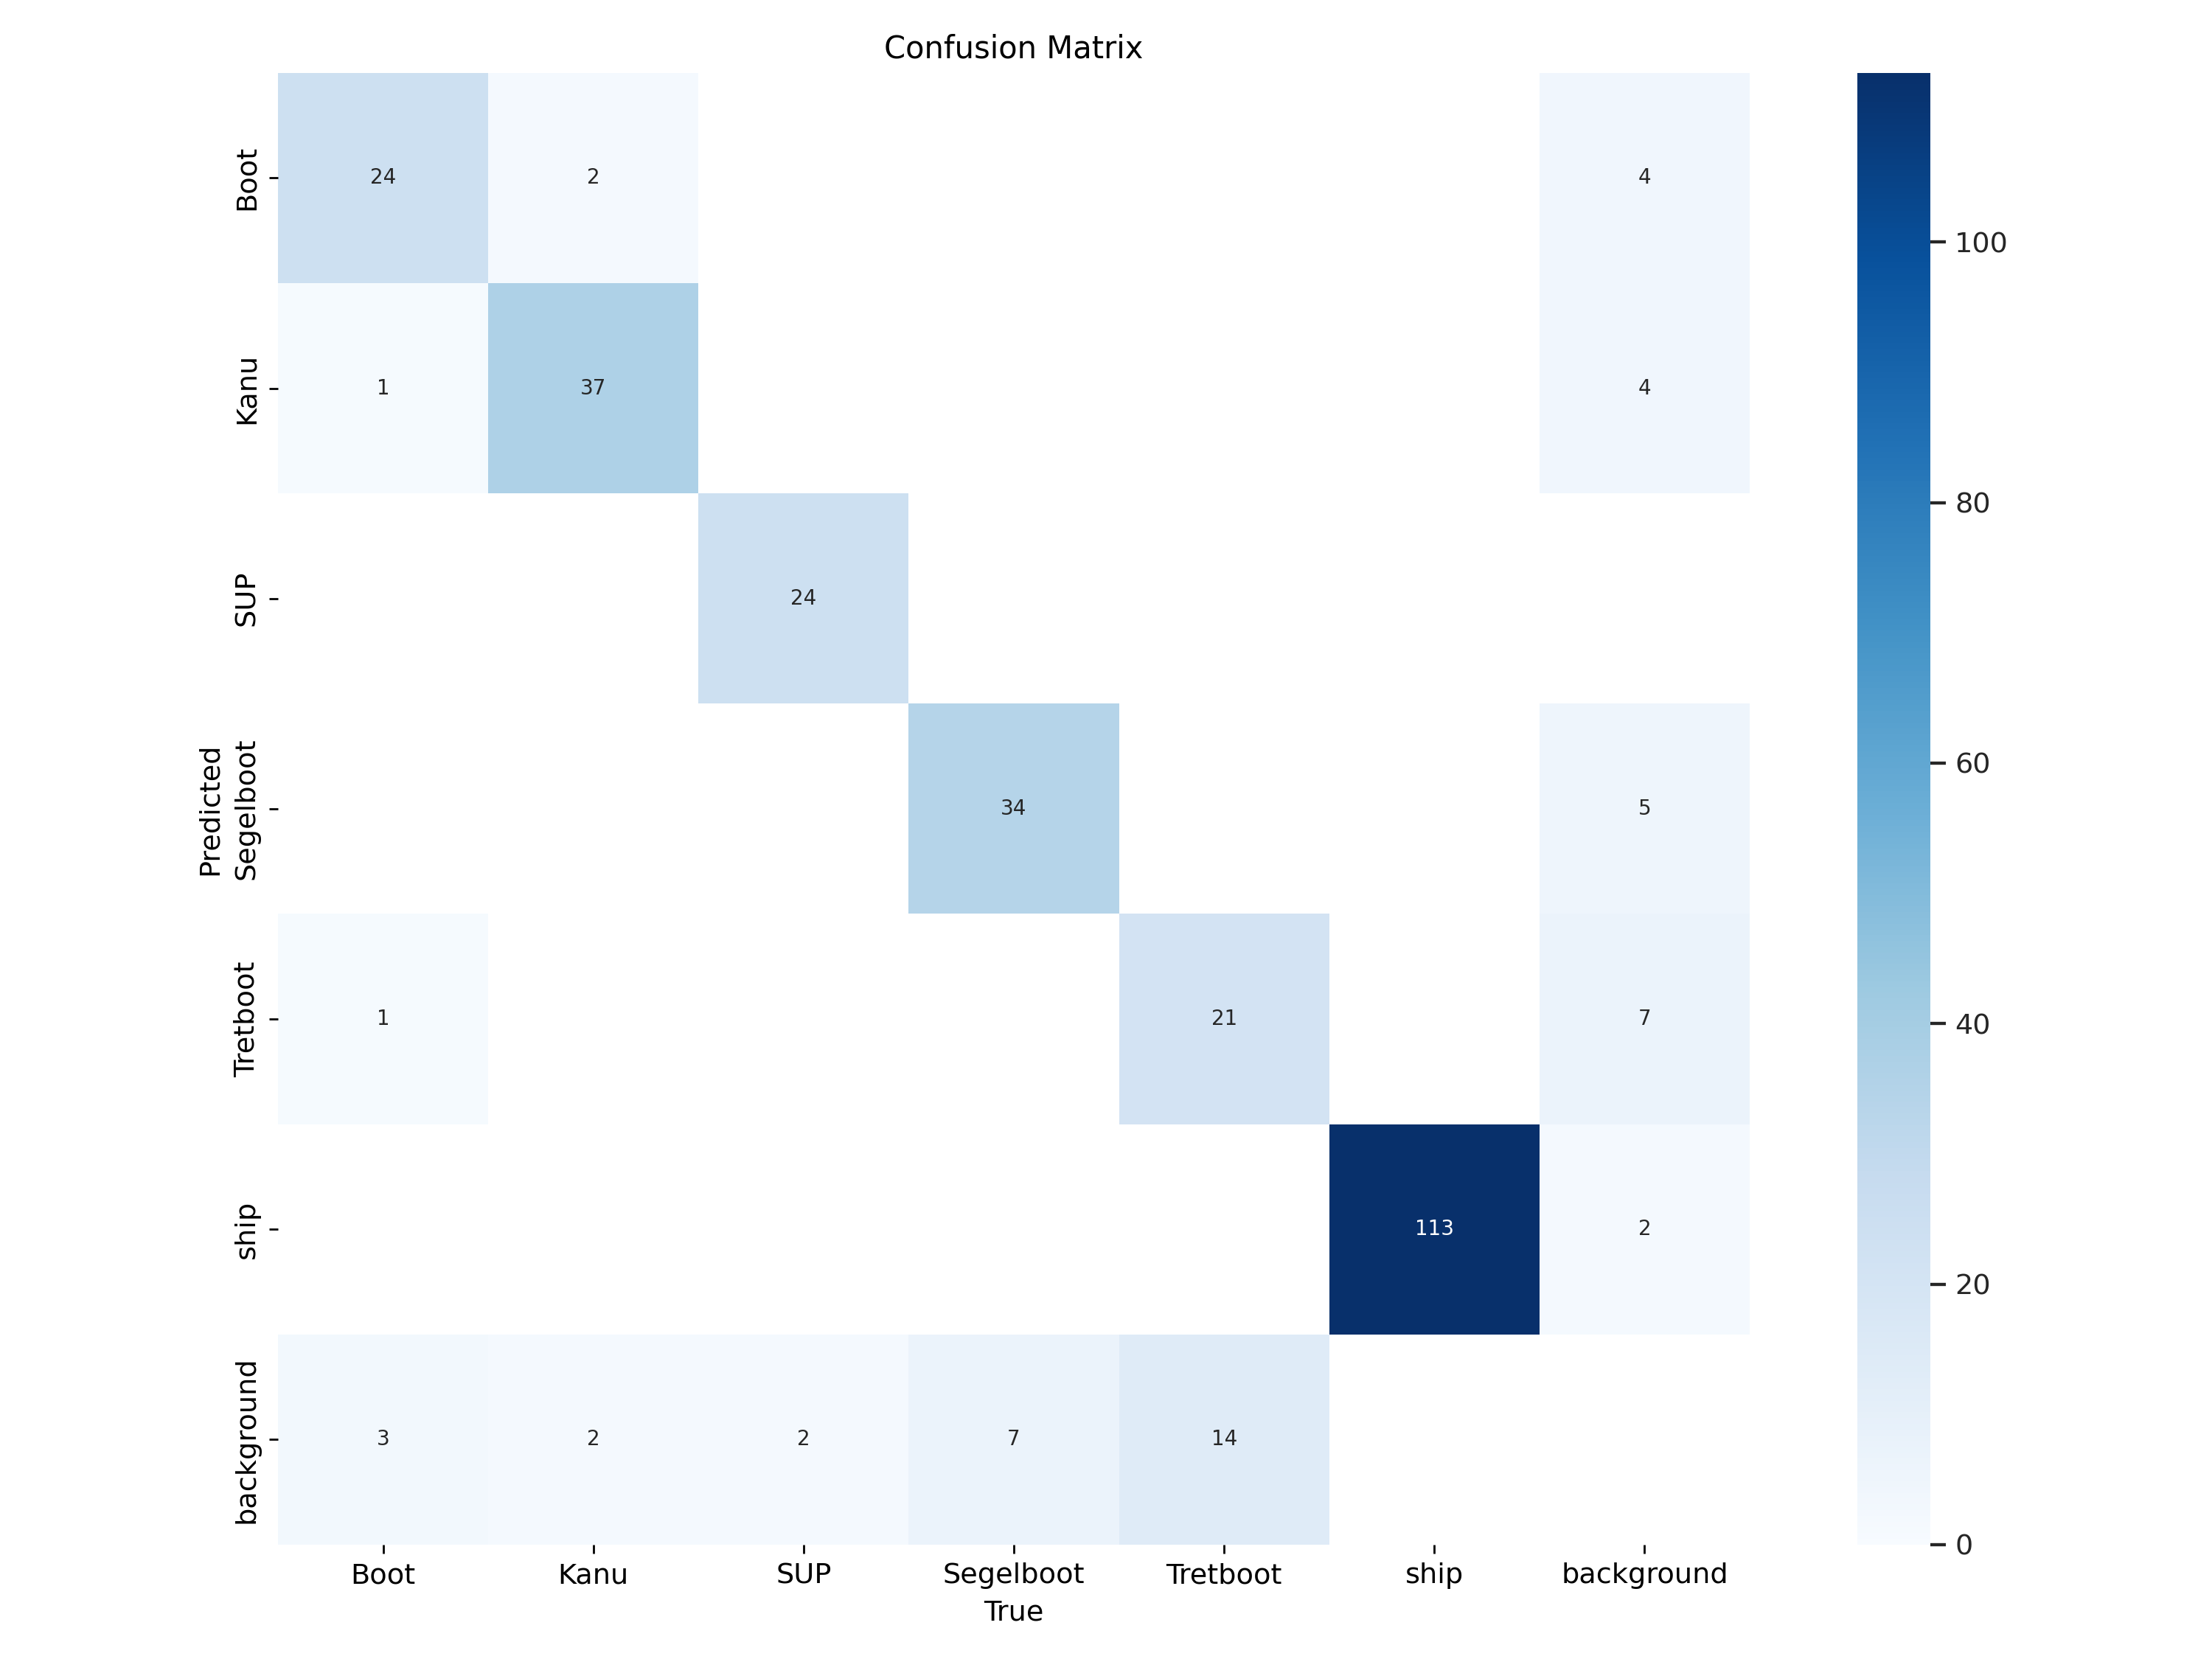

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


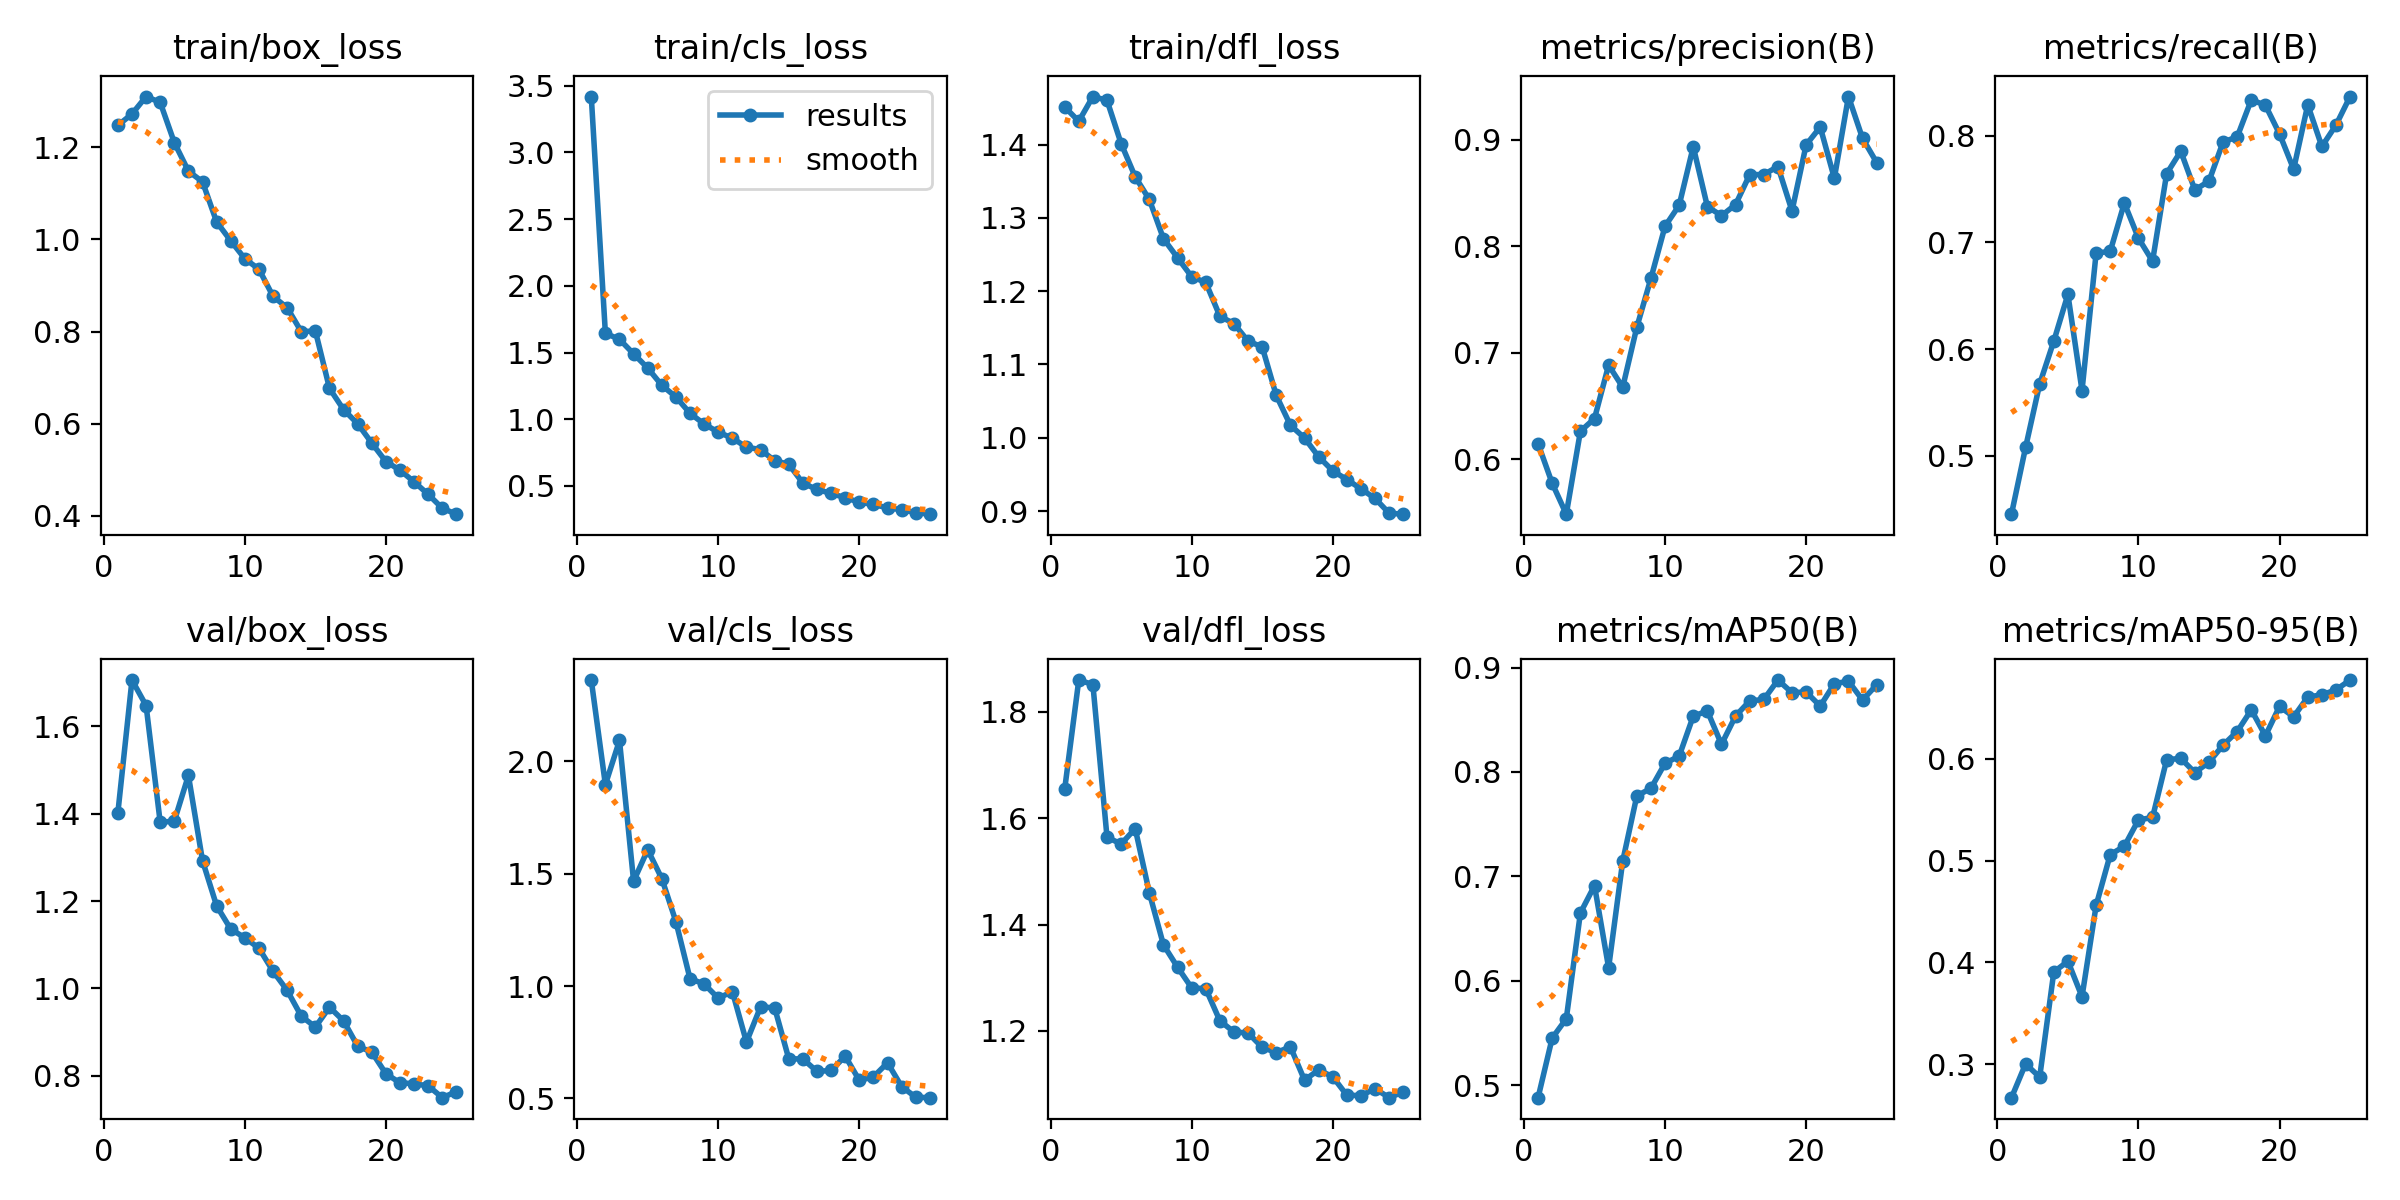

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


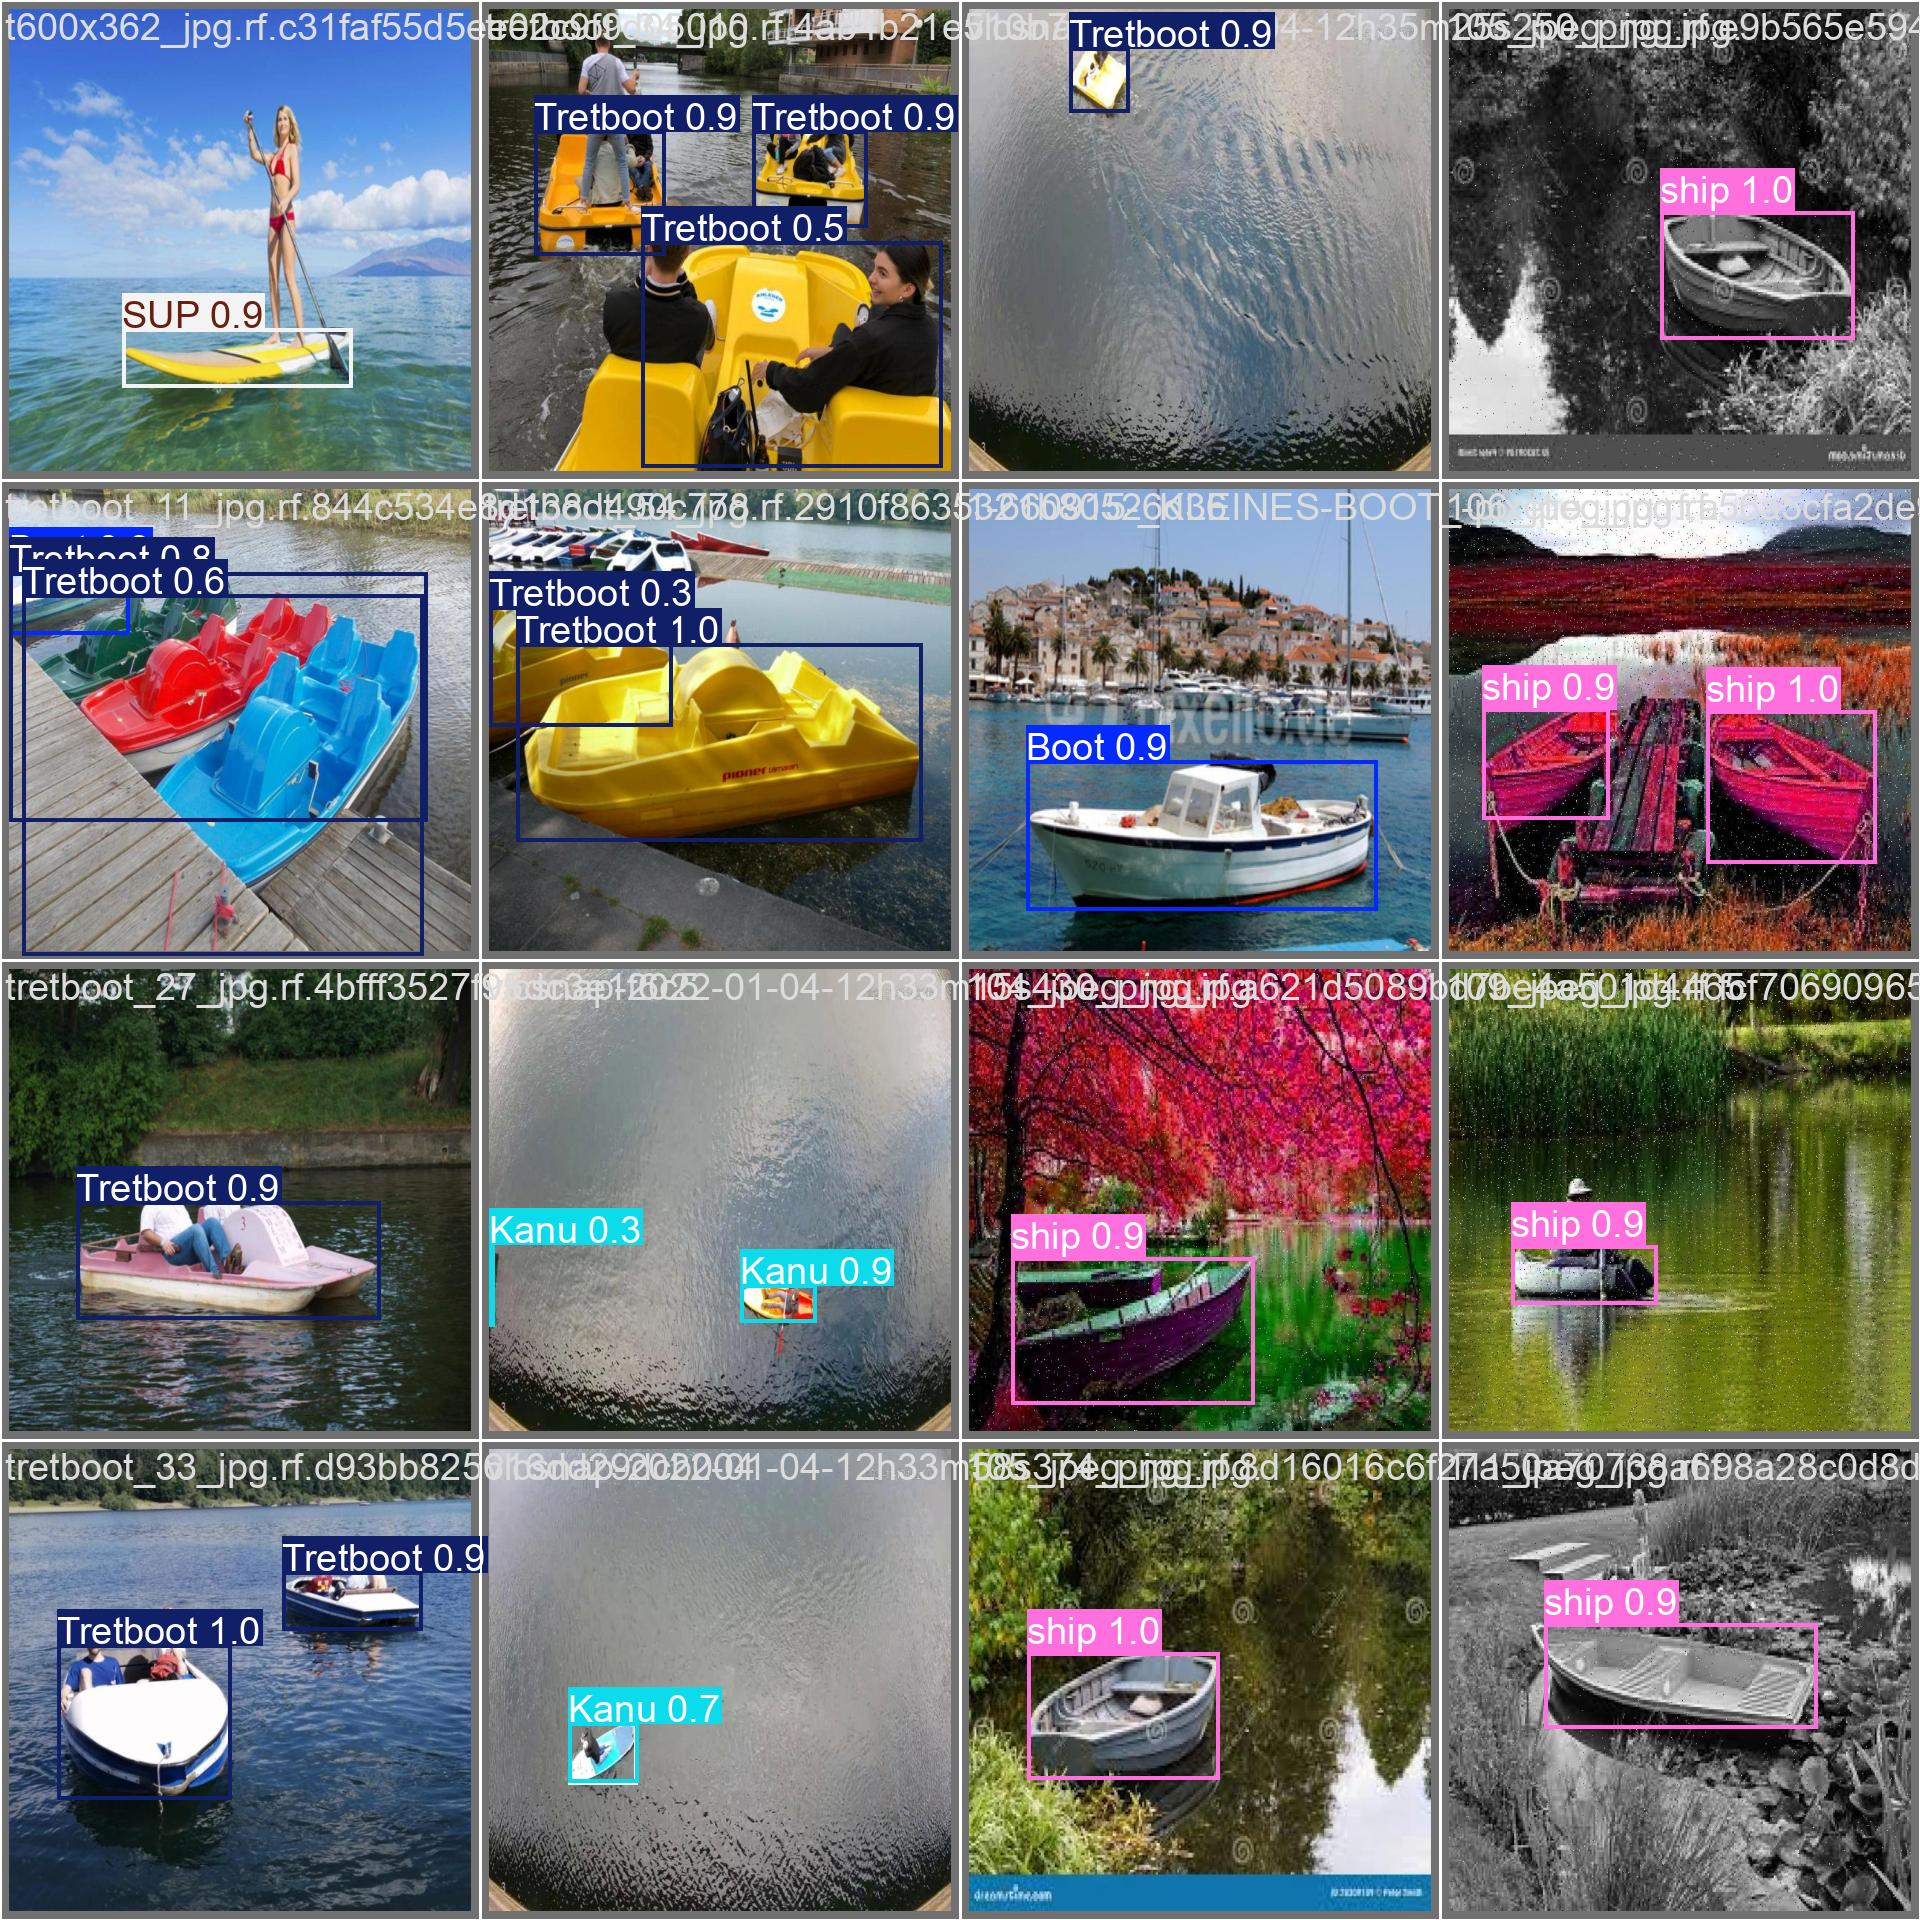

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/perahu-done-1/valid/labels.cache... 195 images, 0 backgrounds, 0 corrupt: 100% 195/195 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:05<00:00,  2.51it/s]
                   all        195        285      0.879      0.837      0.883      0.676
                  Boot         17         29      0.801      0.828      0.919      0.648
                  Kanu         27         41      0.883      0.878      0.925      0.644
                   SUP         18         26      0.955      0.885      0.921      0.675
             Segelboot         18         41      0.871      0.829      0.886       0.61
              Tretboot         14         35      0.781        0.6      0.653      0.502
                  ship  

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/11 /content/datasets/perahu-done-1/test/images/100_jpeg_jpg.rf.778a755de5cf5c5249d326615c1eea3e.jpg: 800x800 1 ship, 22.9ms
image 2/11 /content/datasets/perahu-done-1/test/images/148_jpeg_jpg.rf.572c26099a2ff9d0516b11a373fc2887.jpg: 800x800 1 ship, 22.9ms
image 3/11 /content/datasets/perahu-done-1/test/images/149_jpeg_jpg.rf.e762a6723a3a26d639bca440a676c382.jpg: 800x800 1 ship, 22.8ms
image 4/11 /content/datasets/perahu-done-1/test/images/1bf46c40cf838a98_jpg.rf.435dea51f624961873aac10054131f67.jpg: 800x800 1 Boot, 22.8ms
image 5/11 /content/datasets/perahu-done-1/test/images/34_jpeg_jpg.rf.a8598fed3509be6678531c0cb8b8a4ef.jpg: 800x800 1 ship, 22.8ms
image 6/11 /content/datasets/perahu-done-1/test/images/88_jpeg_jpg.rf.50b51475a6c020a6d8c010a7ea3b7a49.jpg: 800x800 1 ship, 22.8ms
image 7/11 /content/d

**NOTE:** Let's take a look at few results.

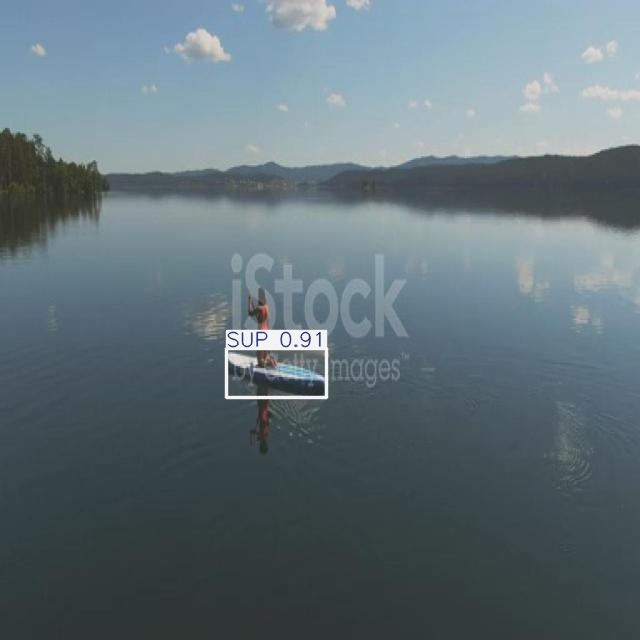

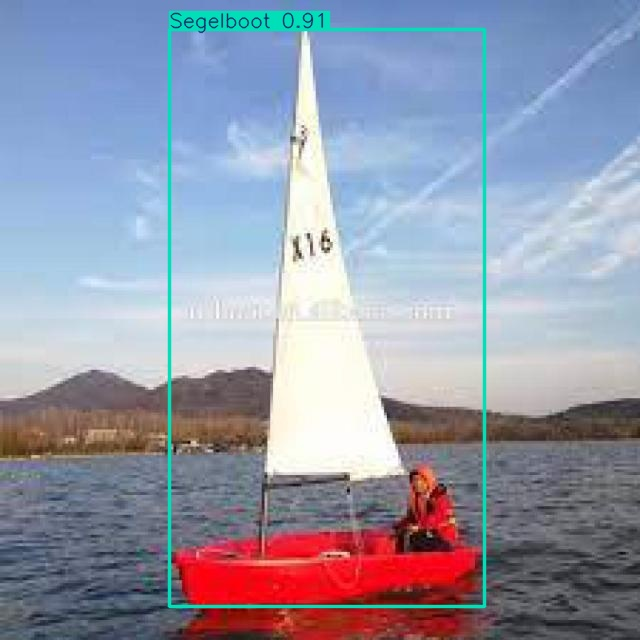

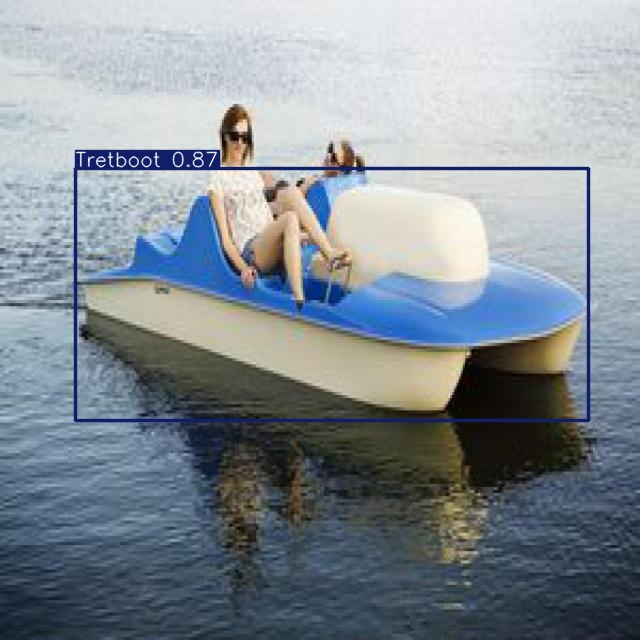

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
from pymongo import MongoClient
import datetime

# Connect to your MongoDB (update with your credentials)
client = MongoClient("put the MongoDB Connection String here ")

# Use your database and collection
db = client["boat_detection"]
collection = db["detections"]

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

# This assumes you've already uploaded an image via `files.upload()`
image_path = list(uploaded.keys())[0]

results = model.predict(source=image_path, conf=0.25, save=True)

In [ ]:
# Get detection results
detections = results[0].boxes

# Number of boats detected
boat_count = len(detections)

# Confidence scores
confidences = detections.conf.cpu().numpy().tolist() if boat_count > 0 else []
average_conf = round(sum(confidences) / boat_count, 4) if boat_count > 0 else 0.0

# Format MongoDB document
document = {
    "image_url": image_path,                  # filename of uploaded image
    "confidence": average_conf,               # average confidence
    "individual_confidences": confidences,    # list of all confidences
    "boat_count": boat_count,                 # number of boats
    "timestamp": datetime.datetime.utcnow()   # optional timestamp
}

# Insert into MongoDB
collection.insert_one(document)

print("✅ Detection result inserted into MongoDB!")